In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree, metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
# from sklearn.metrics import r2_score, f1_score
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer

In [2]:
full_data = pd.read_csv("project_data_syntax_commands.csv", index_col = 0)

In [3]:
# langs_list = list(full_data["Programming_Lang"].unique())
# for i, lang in enumerate(langs_list):
#     full_data = full_data.replace(lang,int(i))

In [4]:
data_set = full_data.copy()
data_set.drop(["User_Name","User_img","User_url","Sol_Code","Challange_Name","Variables Names"], axis = 1, inplace = True)

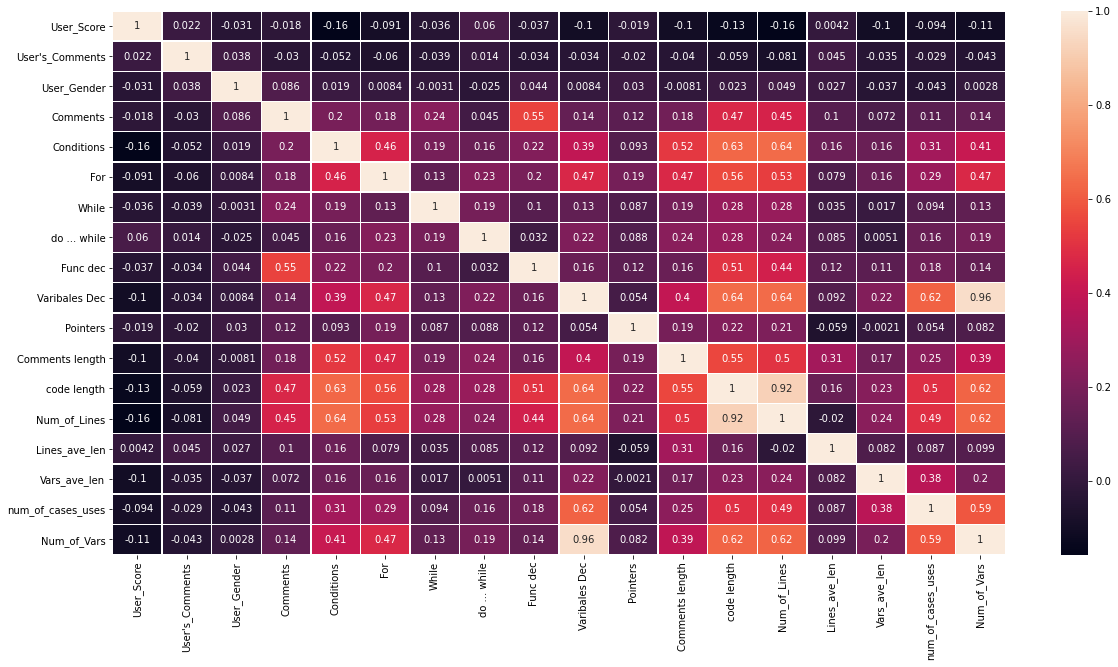

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data_set.corr(), annot=True, linewidths=.5, ax=ax)

In [6]:
data_set["Programming_Lang"].value_counts()

JavaScript    175
Java          169
Csharp        169
Python        150
Ruby          127
PHP           124
Go             86
Python3        84
Swift          61
C              52
Name: Programming_Lang, dtype: int64

In [7]:
JavaScript_df = data_set[data_set["Programming_Lang"]=="JavaScript"]
JavaScript_df.drop("Programming_Lang",axis=1 ,inplace = True)

C:\Users\Noam\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
JavaScript_df

,User_Score,User's_Comments,User_Gender,Comments,Conditions,For,While,do ... while,Func dec,Varibales Dec,Pointers,Comments length,code length,Num_of_Lines,Lines_ave_len,Vars_ave_len,num_of_cases_uses,Num_of_Vars
30,10,5,0,4,119,112,0,132,86,11,0,79,138,32,22,3,2,22
31,10,1,0,1,120,165,0,158,83,22,0,128,138,35,27,5,12,44
32,10,0,0,1,66,71,18,158,61,16,0,121,94,26,22,3,2,34
33,10,0,0,2,139,93,0,132,97,13,0,108,105,31,28,6,6,26
34,10,0,0,1,92,68,0,480,141,13,0,184,107,31,27,4,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,10,0,0,0,0,138,0,0,26,2,0,69,18,5,26,7,2,4
2101,10,0,0,1,0,32,0,0,52,2,0,32,31,9,18,6,2,4
2103,10,-1,0,1,0,44,0,0,52,2,0,44,33,10,19,4,0,4
2105,10,-1,0,2,44,59,0,88,44,5,0,24,66,16,18,5,6,10


In [21]:
JavaScript_df.User_Gender.value_counts()

0    119
1     56
Name: User_Gender, dtype: int64

In [22]:
prop_data_1_1 = prop_data_1_2 = prop_data_1_3 = JavaScript_df.copy()

In [28]:
def devide_to_proportion(data_set):
    prop_data_1_1 = prop_data_1_2 = prop_data_1_3 = JavaScript_df.copy()
    for i in range(3):
        if(i==0): # 1:1
            n_s = 63   
            male_df = data_set[data_set["User_Gender"]==0]
            male_df = male_df.sample(n = n_s, random_state = 2) 
            drop_ind = male_df.index
            prop_data_1_1 = prop_data_1_1.drop(drop_ind,axis=0)
        if(i==1):  # 1:2
            n_s = 7
            male_df = data_set[data_set["User_Gender"]==0]
            male_df = male_df.sample(n = n_s, random_state = 2) 
            drop_ind = male_df.index
            prop_data_1_2 = prop_data_1_2.drop(drop_ind,axis=0)
        if(i==2): # 1:3
            fn_s = 17
            female_df = data_set[data_set["User_Gender"]==1]
            female_df = female_df.sample(n = fn_s, random_state = 2) 
            f_drop_ind = female_df.index
            prop_data_1_3 = prop_data_1_3.drop(f_drop_ind,axis=0)
    return prop_data_1_1, prop_data_1_2, prop_data_1_3

In [29]:
prop_data_1_1, prop_data_1_2, prop_data_1_3 = devide_to_proportion(JavaScript_df)

In [30]:
prop_data_1_3

,User_Score,User's_Comments,User_Gender,Comments,Conditions,For,While,do ... while,Func dec,Varibales Dec,Pointers,Comments length,code length,Num_of_Lines,Lines_ave_len,Vars_ave_len,num_of_cases_uses,Num_of_Vars
30,10,5,0,4,119,112,0,132,86,11,0,79,138,32,22,3,2,22
31,10,1,0,1,120,165,0,158,83,22,0,128,138,35,27,5,12,44
32,10,0,0,1,66,71,18,158,61,16,0,121,94,26,22,3,2,34
33,10,0,0,2,139,93,0,132,97,13,0,108,105,31,28,6,6,26
34,10,0,0,1,92,68,0,480,141,13,0,184,107,31,27,4,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,10,0,0,0,0,138,0,0,26,2,0,69,18,5,26,7,2,4
2101,10,0,0,1,0,32,0,0,52,2,0,32,31,9,18,6,2,4
2103,10,-1,0,1,0,44,0,0,52,2,0,44,33,10,19,4,0,4
2105,10,-1,0,2,44,59,0,88,44,5,0,24,66,16,18,5,6,10


In [31]:
JavaScript_df["User_Gender"][483]

0

In [32]:
prop_data_1_1.shape, prop_data_1_2.shape, prop_data_1_3.shape

((112, 18), (168, 18), (158, 18))

In [33]:
prop_data_1_3.User_Gender.value_counts()

0    119
1     39
Name: User_Gender, dtype: int64

In [34]:
df_list = [prop_data_1_1, prop_data_1_2, prop_data_1_3]

In [35]:
def find_best_k_for_KNN(X_train, y_train):
    parameters = {'n_neighbors':[10,15,20,23,25]}
    knn = KNeighborsClassifier(n_neighbors=parameters['n_neighbors'])
    clf = GridSearchCV(knn,parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_K = clf.best_params_['n_neighbors']
#     best_f1_val = clf.best_score_
    
    
    return best_K

def find_best_decision_tree_params(X_train, y_train):

    parameters = {'max_depth':[4,6,8,10,15,20],"min_samples_split":[5,10,12,17,20] }
    dt = tree.DecisionTreeClassifier()

    clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_max_depth = clf.best_params_['max_depth']
    best_min_samples_split = clf.best_params_['min_samples_split']
#     best_f1_val = clf.best_score_
    return best_max_depth, best_min_samples_split

def find_best_random_forest_num_estimators(X_train, y_train):
    param_grid = {'max_depth':[5,10,15],"min_samples_split":[5,10,17,22],'n_estimators':[10,20,30]}

    rf = RandomForestClassifier()

    clf = GridSearchCV(rf, param_grid,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    
    best_num_estimators = clf.best_params_
#     best_f1_val = clf.best_score_
    return best_num_estimators



def find_best_svm(X_train, y_train):
    param_grid= {'kernel': ('linear', 'rbf'),'C': [5, 10, 20]}
    sv = svm.SVC()
    clf = GridSearchCV(sv, param_grid,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    
    best_kernel = clf.best_params_['kernel']
    best_C = clf.best_params_['C']

#     best_f1_val = clf.best_score_
    return best_kernel, best_C



def find_best_model(X_train, y_train, max_depth_val, min_samples_split_val,clfs):

    best_recall_val = 0
    best_clf = clf1
    for i,clf in enumerate(clfs):
        print(clf)
        clf.fit(X_train,y_train)
        if(i==2): continue
        scores = cross_val_score(clf, X_train, y_train, cv=10).mean()
        print(scores)
        if(best_recall_val<scores):
            best_clf = clf
            best_recall_val = scores
            
    return best_clf, best_recall_val


In [36]:
def df_predict(data_set_prop, prop_str):
    X = data_set_prop.drop(["User_Gender"],axis=1).copy()
    y = data_set_prop.loc[:,"User_Gender"]
    # X = scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
    print("****************************************")
    print("Data Proportion: ", prop_str)
    print("****************************************")
    print(" ")
    print(" ")
    
    best_params_dt = find_best_decision_tree_params(X_train, y_train)
    best_params_rf = find_best_random_forest_num_estimators(X_train, y_train)
    best_params_knn = find_best_k_for_KNN(X_train, y_train)
    best_params_svm = find_best_svm(X_train, y_train)
    
    clf1 = tree.DecisionTreeClassifier(max_depth=best_params_dt[0],min_samples_split= best_params_dt[1] )
    clf2 = RandomForestClassifier(max_depth=best_params_rf["max_depth"],min_samples_split= best_params_rf["min_samples_split"],n_estimators=best_params_rf["n_estimators"])
    clf3 = KNeighborsClassifier(n_neighbors=best_params_knn)
    clf4 = GaussianNB()
    clf5 = svm.SVC(C=best_params_svm[1],kernel=best_params_svm[0])

    algs = ["DT","RandForest","KNN","NB", "SVM"]
    clfs = [clf1,clf2,clf3, clf4, clf5]

    for i,clf in enumerate(clfs):
        clf.fit(X_train,y_train)
        print(algs[i])
        print("======")
        y_pred = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)

        print("accuracy on train data",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
        print("accuracy on test data",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))

        print(metrics.confusion_matrix(y_test,y_pred))

In [ ]:
prop_list = ["1-1","1-2","1-3"]
for i in range(3):
    df_predict(df_list[i], prop_list[i])

****************************************
Data Proportion:  1-1
****************************************
 
 
